# Feature extraction from the datasets

### Author: Danial Haris & Kai Li Ong

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from csv import writer
from pprint import pprint
from csv import DictWriter
from matplotlib import pyplot as plt

### Extract features from 1 image

In [2]:
# Load an image from folder
#main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods"
main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
image_path = os.path.join(main_project_path,"dataset", "Kamm", "image_10.png")

image = cv2.imread(image_path)
image_copy = image.copy()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Threshold for checking image brightness

Light Image


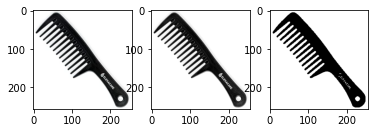

In [3]:
dark_bright_threshold = 200
mean_of_gray_image = np.mean(image_gray)

#Select threshold for further operation based on image brightness
if mean_of_gray_image < dark_bright_threshold:
    # Image is dark
    contour_recognition_threshold = 120
    print("Dark Image")
else:
    #Image is bright
    contour_recognition_threshold = 200
    print("Light Image")


_, image_thresh = cv2.threshold(image_gray, contour_recognition_threshold, 255, cv2.THRESH_BINARY)
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_gray, "gray")
plt.subplot(1, 3, 3)
plt.imshow(image_thresh, "gray")

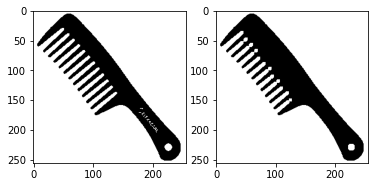

In [4]:
plt.subplot(1,2,1)
plt.imshow(image_thresh, "gray")
kernel = np.ones((3, 3), np.uint8)
image_thresh = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.subplot(1, 2, 2)
plt.imshow(image_thresh, "gray")

#### Find contours of the object to get greatest contour by area

Area 15135.5


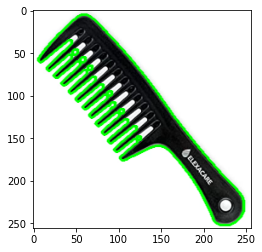

In [5]:
contours, _ = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

# get greatest contour by area
im_boundary = (image_thresh.shape[0] - 1) * (image_thresh.shape[1] - 1)
areas = [cv2.contourArea(ar) for ar in contours]
cnt = [x for x in areas if x != im_boundary]
cnt = contours[areas.index(max(cnt))]
contour_area = cv2.contourArea(cnt)
print("Area", contour_area)

to_show_contour = image_copy.copy()
cv2.drawContours(to_show_contour, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(to_show_contour)

#### Find ractangle of the object

Rectangle 304.4660949707031 84.83128356933594
Ratio width-length 3.5890780165061518


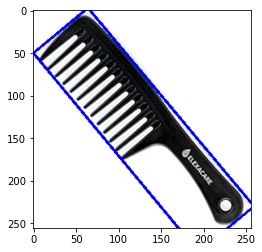

In [6]:
rect = cv2.minAreaRect(cnt)
rect_area = rect[1][0] * rect[1][1]
box = cv2.boxPoints(rect)
box = np.int0(box)
print("Rectangle", rect[1][0], rect[1][1])

to_show_box = image_copy.copy()
cv2.drawContours(to_show_box, [box], 0, (0, 0, 255), 2)
plt.imshow(to_show_box)

# ratio width & length
a = rect[1][0] / rect[1][1]
print("Ratio width-length", a)

#### Convex Hull : find the exterior or shape of the object

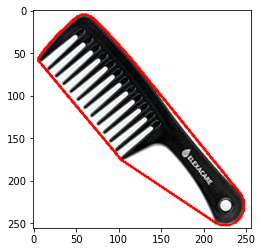

In [7]:
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
to_show_hull = image_copy.copy()
cv2.drawContours(to_show_hull, [hull], 0, (255, 0, 0), 2)
plt.imshow(to_show_hull)

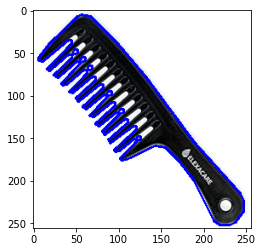

In [8]:
contour_perimeters = cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, 0.001 * contour_perimeters, True)
approximation_area = cv2.contourArea(approx)
to_show_approx = image_copy.copy()
cv2.drawContours(to_show_approx, [approx], -1, (0, 0, 255), 2)
plt.imshow(to_show_approx)

#### Detect good corners

good corners 47


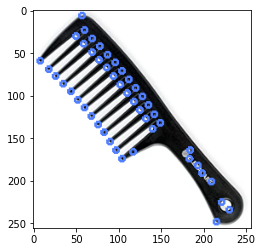

In [9]:
# Detect corners from grayscale image
corners = cv2.goodFeaturesToTrack(np.float32(image_gray), 100, 0.01, 10)
corners = np.int0(corners)
to_show_corners = image_copy.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(to_show_corners, (x, y), 3, (80, 127, 255), 2)
plt.imshow(to_show_corners)
print("good corners", len(corners))

#### Harris Corners

harris corners 257


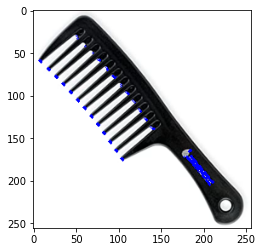

In [10]:
h_corners = cv2.cornerHarris(np.float32(image_gray), 2, 3, 0.04)
h_corners = np.int0(h_corners)
to_show_corners_harris = image_copy.copy()
h_threshold = 0.05
for i in range(h_corners.shape[0]):
    for j in range(h_corners.shape[1]):
        if h_corners[i, j] > h_corners.max() * h_threshold:
            cv2.circle(to_show_corners_harris, (j, i), 1, (0, 0, 255), 1)
plt.imshow(to_show_corners_harris)
amount_h_corners = len(h_corners[h_corners > h_corners.max() * h_threshold])
print("harris corners", amount_h_corners)

### Extract features from all dataset

In [11]:
# Load images
#main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods"
main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
image_folder = os.path.join(main_project_path,"dataset")
feature_path = os.path.join(main_project_path,"feature","feature.csv")

# join image_folder with 
buerste_path = os.path.join(image_folder,"Buerste")
kamm_path = os.path.join(image_folder,"Kamm")

# check the number of images in the paths
buerste_list = os.listdir(buerste_path)
kamm_list = os.listdir(kamm_path)
number_files_buerste = len(buerste_list)
number_files_kamm = len(kamm_list)
print("number_files_buerste: ", number_files_buerste)
print("number_files_kamm: ", number_files_kamm)

images_list = []
valid_images = [".jpg",".png"]

for f in os.listdir(buerste_path):
    images_list.append(os.path.join(buerste_path,f))
    
for f in os.listdir(kamm_path):
    images_list.append(os.path.join(kamm_path,f))

number_files_buerste:  400
number_files_kamm:  400


{'contour_points': 676, 'amount_contours': 3, 'rect_area': 20729.54524463974, 'hull_area': 14977.0, 'approximation_area': 10152.5, 'contour_perimeters': 789.4945094585419, 'corners': 53, 'harris_corners': 901, 'ratio_wide_length': 3.3993290006917114, 'contour_length_area_ratio': 0.07731046900299078, 'contour_length_rect_area_ratio': 0.038085471733283194, 'contour_length_hull_area_ratio': 0.05271379511641463, 'contour_rect_length_ratio': 1.1490379934398853, 'contour_hull_length_ratio': 1.3183012217982621, 'extent': 0.492630199046003, 'solidity': 0.6818454964278561, 'hull_rectangle_ratio': 0.7224953477391292, 'Type': 0}
{'contour_points': 1725, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48154.5, 'contour_perimeters': 1847.192993760109, 'corners': 92, 'harris_corners': 1582, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03850845854592303, 'contour_length_rect_area_ratio': 0.02840742781637999, 'contour_length_hull_area_ratio': 0.02840

{'contour_points': 1013, 'amount_contours': 14, 'rect_area': 65025.0, 'hull_area': 64292.0, 'approximation_area': 64132.5, 'contour_perimeters': 1015.899494767189, 'corners': 60, 'harris_corners': 440, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.01582977405697084, 'contour_length_rect_area_ratio': 0.015623214067930626, 'contour_length_hull_area_ratio': 0.015801336010190833, 'contour_rect_length_ratio': 0.9959798968305775, 'contour_hull_length_ratio': 1.0027484981705586, 'extent': 0.9869511726259131, 'solidity': 0.998203508990232, 'hull_rectangle_ratio': 0.9887274125336409, 'Type': 0}
{'contour_points': 383, 'amount_contours': 2, 'rect_area': 9735.0, 'hull_area': 7252.5, 'approximation_area': 6115.5, 'contour_perimeters': 420.69343197345734, 'corners': 31, 'harris_corners': 79, 'ratio_wide_length': 0.3107344632768362, 'contour_length_area_ratio': 0.06880258925070853, 'contour_length_rect_area_ratio': 0.04321452819449998, 'contour_length_hull_area_ratio': 0.05800667796945293

{'contour_points': 1568, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 53643.0, 'contour_perimeters': 1665.7543950080872, 'corners': 26, 'harris_corners': 305, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.031054911445181438, 'contour_length_rect_area_ratio': 0.025617137947067853, 'contour_length_hull_area_ratio': 0.025617137947067853, 'contour_rect_length_ratio': 1.6330925441255757, 'contour_hull_length_ratio': 1.6330925441255757, 'extent': 0.8248981161091887, 'solidity': 0.8248981161091887, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1881, 'amount_contours': 12, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 50004.5, 'contour_perimeters': 1987.4528793096542, 'corners': 79, 'harris_corners': 905, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03968278733134973, 'contour_length_rect_area_ratio': 0.030564442588383763, 'contour_length_hull_area_ratio': 0.030564442588383763, 'contour_rect_leng

{'contour_points': 1066, 'amount_contours': 10, 'rect_area': 28349.06361858826, 'hull_area': 19919.5, 'approximation_area': 16862.5, 'contour_perimeters': 1147.1858534812927, 'corners': 100, 'harris_corners': 761, 'ratio_wide_length': 1.1172447815437492, 'contour_length_area_ratio': 0.06786475706822602, 'contour_length_rect_area_ratio': 0.04046644604970627, 'contour_length_hull_area_ratio': 0.05759109683884097, 'contour_rect_length_ratio': 1.7007384262730003, 'contour_hull_length_ratio': 2.1358948069907835, 'extent': 0.5962807176783144, 'solidity': 0.8486156781043701, 'hull_rectangle_ratio': 0.7026510740530751, 'Type': 0}
{'contour_points': 1680, 'amount_contours': 4, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 50796.0, 'contour_perimeters': 1773.6122596263885, 'corners': 67, 'harris_corners': 551, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.034919126232997096, 'contour_length_rect_area_ratio': 0.027275851743581523, 'contour_length_hull_area_ratio': 0

{'contour_points': 968, 'amount_contours': 7, 'rect_area': 26754.20496230945, 'hull_area': 20140.0, 'approximation_area': 16132.0, 'contour_perimeters': 1040.9015827178955, 'corners': 91, 'harris_corners': 387, 'ratio_wide_length': 1.8315605173865244, 'contour_length_area_ratio': 0.06440824099485772, 'contour_length_rect_area_ratio': 0.038906092862198205, 'contour_length_hull_area_ratio': 0.05168329606345062, 'contour_rect_length_ratio': 1.5207871587886088, 'contour_hull_length_ratio': 1.8256924450456113, 'extent': 0.604054578439806, 'solidity': 0.8024329692154916, 'hull_rectangle_ratio': 0.752778863299158, 'Type': 0}
{'contour_points': 794, 'amount_contours': 2, 'rect_area': 33150.0, 'hull_area': 31149.0, 'approximation_area': 27617.0, 'contour_perimeters': 814.710676908493, 'corners': 57, 'harris_corners': 307, 'ratio_wide_length': 0.5098039215686274, 'contour_length_area_ratio': 0.029504605689656793, 'contour_length_rect_area_ratio': 0.024576491007797678, 'contour_length_hull_area_r

{'contour_points': 1666, 'amount_contours': 5, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 49946.5, 'contour_perimeters': 1768.7249574661255, 'corners': 70, 'harris_corners': 523, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03544610027187169, 'contour_length_rect_area_ratio': 0.027200691387406776, 'contour_length_hull_area_ratio': 0.027200691387406776, 'contour_rect_length_ratio': 1.7340440759471818, 'contour_hull_length_ratio': 1.7340440759471818, 'extent': 0.7673817762399078, 'solidity': 0.7673817762399078, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 1694, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 48289.0, 'contour_perimeters': 1795.068103313446, 'corners': 68, 'harris_corners': 435, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.037198858241740844, 'contour_length_rect_area_ratio': 0.02760581473761547, 'contour_length_hull_area_ratio': 0.02760581473761547, 'contour_rect_length_r

{'contour_points': 1020, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 65014.0, 'contour_perimeters': 1022.4852812290192, 'corners': 42, 'harris_corners': 197, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015727397308677022, 'contour_length_rect_area_ratio': 0.015724494905482802, 'contour_length_hull_area_ratio': 0.015724494905482802, 'contour_rect_length_ratio': 1.0024365502245285, 'contour_hull_length_ratio': 1.0024365502245285, 'extent': 0.9998154555940023, 'solidity': 0.9998154555940023, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 877, 'amount_contours': 17, 'rect_area': 32367.926216554362, 'hull_area': 23701.5, 'approximation_area': 19895.5, 'contour_perimeters': 997.5361396074295, 'corners': 97, 'harris_corners': 461, 'ratio_wide_length': 0.48338697967685534, 'contour_length_area_ratio': 0.05017913627643701, 'contour_length_rect_area_ratio': 0.030818660822862547, 'contour_length_hull_area_ratio': 0.0420874687090

{'contour_points': 692, 'amount_contours': 2, 'rect_area': 22110.778498761356, 'hull_area': 15210.5, 'approximation_area': 13064.5, 'contour_perimeters': 785.6122596263885, 'corners': 73, 'harris_corners': 803, 'ratio_wide_length': 3.2375311902575246, 'contour_length_area_ratio': 0.0600483268077955, 'contour_length_rect_area_ratio': 0.03553073717736345, 'contour_length_hull_area_ratio': 0.051649338261489666, 'contour_rect_length_ratio': 1.1216834502035793, 'contour_hull_length_ratio': 1.321575846760083, 'extent': 0.591702368179072, 'solidity': 0.8601295157950101, 'hull_rectangle_ratio': 0.6879224085597931, 'Type': 0}
{'contour_points': 846, 'amount_contours': 5, 'rect_area': 28340.753848808352, 'hull_area': 19701.5, 'approximation_area': 17316.0, 'contour_perimeters': 924.7005722522736, 'corners': 100, 'harris_corners': 887, 'ratio_wide_length': 0.8276297048740138, 'contour_length_area_ratio': 0.05325082477698091, 'contour_length_rect_area_ratio': 0.032627945508625016, 'contour_length_

{'contour_points': 670, 'amount_contours': 2, 'rect_area': 19416.43257466168, 'hull_area': 15594.0, 'approximation_area': 12276.5, 'contour_perimeters': 727.9898953437805, 'corners': 59, 'harris_corners': 970, 'ratio_wide_length': 0.3364468460562539, 'contour_length_area_ratio': 0.059282564767408834, 'contour_length_rect_area_ratio': 0.03749349385086335, 'contour_length_hull_area_ratio': 0.046683974307027094, 'contour_rect_length_ratio': 1.133749677171746, 'contour_hull_length_ratio': 1.2890365002218598, 'extent': 0.632453976948645, 'solidity': 0.7874823650121842, 'hull_rectangle_ratio': 0.8031341462978152, 'Type': 0}
{'contour_points': 524, 'amount_contours': 2, 'rect_area': 13688.0, 'hull_area': 10108.5, 'approximation_area': 8287.0, 'contour_perimeters': 560.4507913589478, 'corners': 34, 'harris_corners': 762, 'ratio_wide_length': 0.2457627118644068, 'contour_length_area_ratio': 0.0676138003811012, 'contour_length_rect_area_ratio': 0.04094468084153622, 'contour_length_hull_area_rati

{'contour_points': 2020, 'amount_contours': 30, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 41729.0, 'contour_perimeters': 2185.6854152679443, 'corners': 100, 'harris_corners': 665, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.05258981774423003, 'contour_length_rect_area_ratio': 0.03361300138820368, 'contour_length_hull_area_ratio': 0.03361300138820368, 'contour_rect_length_ratio': 2.1428288384979846, 'contour_hull_length_ratio': 2.1428288384979846, 'extent': 0.6391541714725105, 'solidity': 0.6391541714725105, 'hull_rectangle_ratio': 1.0, 'Type': 0}
{'contour_points': 696, 'amount_contours': 16, 'rect_area': 17928.0, 'hull_area': 12120.5, 'approximation_area': 9582.0, 'contour_perimeters': 734.1076455116272, 'corners': 100, 'harris_corners': 620, 'ratio_wide_length': 0.38425925925925924, 'contour_length_area_ratio': 0.07680557077962201, 'contour_length_rect_area_ratio': 0.04094754827708764, 'contour_length_hull_area_ratio': 0.06056743909175588, 'contou

{'contour_points': 598, 'amount_contours': 2, 'rect_area': 19699.993942261208, 'hull_area': 15111.0, 'approximation_area': 12802.0, 'contour_perimeters': 660.1320307254791, 'corners': 66, 'harris_corners': 103, 'ratio_wide_length': 0.5076142143774994, 'contour_length_area_ratio': 0.05152048940337775, 'contour_length_rect_area_ratio': 0.03350925044242464, 'contour_length_hull_area_ratio': 0.04368552913278268, 'contour_rect_length_ratio': 1.1113335563486617, 'contour_hull_length_ratio': 1.3025924653710013, 'extent': 0.650406291370123, 'solidity': 0.847925352392297, 'hull_rectangle_ratio': 0.767056073432758, 'Type': 0}
{'contour_points': 1918, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64953.0, 'approximation_area': 49292.5, 'contour_perimeters': 2019.8965303897858, 'corners': 62, 'harris_corners': 259, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04109657233753379, 'contour_length_rect_area_ratio': 0.03106339121659801, 'contour_length_hull_area_ratio':

{'contour_points': 1570, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65007.5, 'approximation_area': 53779.5, 'contour_perimeters': 1615.5634891986847, 'corners': 51, 'harris_corners': 118, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.030046932919183988, 'contour_length_rect_area_ratio': 0.02484526703881099, 'contour_length_hull_area_ratio': 0.024851955377436213, 'contour_rect_length_ratio': 1.5838857737242007, 'contour_hull_length_ratio': 1.589179415363146, 'extent': 0.826881968473664, 'solidity': 0.827104564857901, 'hull_rectangle_ratio': 0.9997308727412534, 'Type': 0}
{'contour_points': 391, 'amount_contours': 2, 'rect_area': 12331.449376299046, 'hull_area': 10309.0, 'approximation_area': 9896.5, 'contour_perimeters': 429.52185904979706, 'corners': 38, 'harris_corners': 92, 'ratio_wide_length': 1.660303095866807, 'contour_length_area_ratio': 0.043401390294528074, 'contour_length_rect_area_ratio': 0.03483141729270972, 'contour_length_hull_area_ratio': 0.041664

{'contour_points': 680, 'amount_contours': 8, 'rect_area': 18174.24883920187, 'hull_area': 13567.5, 'approximation_area': 10341.5, 'contour_perimeters': 734.6761870384216, 'corners': 77, 'harris_corners': 1138, 'ratio_wide_length': 0.3395436948387344, 'contour_length_area_ratio': 0.07087364335697681, 'contour_length_rect_area_ratio': 0.04042401936600122, 'contour_length_hull_area_ratio': 0.05414970975039039, 'contour_rect_length_ratio': 1.1853010885870896, 'contour_hull_length_ratio': 1.411024448528033, 'extent': 0.5703674518663202, 'solidity': 0.7640316933849273, 'hull_rectangle_ratio': 0.7465232879795775, 'Type': 0}
{'contour_points': 1847, 'amount_contours': 4, 'rect_area': 65025.0, 'hull_area': 63251.5, 'approximation_area': 46476.5, 'contour_perimeters': 1962.5655771493912, 'corners': 78, 'harris_corners': 382, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.04235189367924538, 'contour_length_rect_area_ratio': 0.03018170822221286, 'contour_length_hull_area_ratio': 0.03102

{'contour_points': 1012, 'amount_contours': 2, 'rect_area': 64770.0, 'hull_area': 64319.5, 'approximation_area': 64231.5, 'contour_perimeters': 1014.4852812290192, 'corners': 38, 'harris_corners': 55, 'ratio_wide_length': 0.996078431372549, 'contour_length_area_ratio': 0.01579530853424602, 'contour_length_rect_area_ratio': 0.01566288839322247, 'contour_length_hull_area_ratio': 0.01577259277869105, 'contour_rect_length_ratio': 0.9965474275334176, 'contour_hull_length_ratio': 1.0023410412650628, 'extent': 0.9916164891153312, 'solidity': 0.9985618669299358, 'hull_rectangle_ratio': 0.9930446194225722, 'Type': 0}
{'contour_points': 1506, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64921.0, 'approximation_area': 57748.0, 'contour_perimeters': 1626.9503531455994, 'corners': 34, 'harris_corners': 120, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.028171812663773776, 'contour_length_rect_area_ratio': 0.025020388197801127, 'contour_length_hull_area_ratio': 0.025

{'contour_points': 988, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 63972.5, 'approximation_area': 63781.5, 'contour_perimeters': 1001.2548332214355, 'corners': 35, 'harris_corners': 48, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015699801383323175, 'contour_length_rect_area_ratio': 0.015397998204097433, 'contour_length_hull_area_ratio': 0.015651331950782534, 'contour_rect_length_ratio': 0.9816223855112113, 'contour_hull_length_ratio': 1.0088474321274923, 'extent': 0.9807766243752403, 'solidity': 0.9969127359412248, 'hull_rectangle_ratio': 0.9838139177239523, 'Type': 0}
{'contour_points': 1011, 'amount_contours': 2, 'rect_area': 65024.98443603609, 'hull_area': 64921.5, 'approximation_area': 64785.5, 'contour_perimeters': 1014.7279218435287, 'corners': 36, 'harris_corners': 112, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015633687255414, 'contour_length_rect_area_ratio': 0.015605200533983956, 'contour_length_hull_area_ratio': 0.01563007511908272,

{'contour_points': 1820, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64484.5, 'approximation_area': 54120.5, 'contour_perimeters': 1892.0731556415558, 'corners': 52, 'harris_corners': 225, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03500338838275716, 'contour_length_rect_area_ratio': 0.02909763334895919, 'contour_length_hull_area_ratio': 0.02934151859193381, 'contour_rect_length_ratio': 1.8549739039988236, 'contour_hull_length_ratio': 1.8901269646075334, 'extent': 0.8312804757865333, 'solidity': 0.8382479510580062, 'hull_rectangle_ratio': 0.9916880497438988, 'Type': 0}
{'contour_points': 555, 'amount_contours': 2, 'rect_area': 18297.949064339045, 'hull_area': 14442.0, 'approximation_area': 12087.5, 'contour_perimeters': 682.991983294487, 'corners': 50, 'harris_corners': 264, 'ratio_wide_length': 4.482074618391366, 'contour_length_area_ratio': 0.05640599440843102, 'contour_length_rect_area_ratio': 0.03732614955331651, 'contour_length_hull_area_ratio'

{'contour_points': 525, 'amount_contours': 5, 'rect_area': 13420.0, 'hull_area': 10775.0, 'approximation_area': 9344.0, 'contour_perimeters': 565.1787132024765, 'corners': 62, 'harris_corners': 1068, 'ratio_wide_length': 0.2772727272727273, 'contour_length_area_ratio': 0.06046308779914164, 'contour_length_rect_area_ratio': 0.04211465821180898, 'contour_length_hull_area_ratio': 0.052452780807654434, 'contour_rect_length_ratio': 1.0056560733140152, 'contour_hull_length_ratio': 1.1156768080707895, 'extent': 0.6965350223546944, 'solidity': 0.8675174013921114, 'hull_rectangle_ratio': 0.8029061102831595, 'Type': 0}
{'contour_points': 1621, 'amount_contours': 12, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 53390.5, 'contour_perimeters': 1696.8010774850845, 'corners': 86, 'harris_corners': 516, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03174824966526807, 'contour_length_rect_area_ratio': 0.026094595578394227, 'contour_length_hull_area_ratio': 0.026094595578

{'contour_points': 1008, 'amount_contours': 2, 'rect_area': 65024.98443603609, 'hull_area': 64862.5, 'approximation_area': 64784.5, 'contour_perimeters': 1013.798989534378, 'corners': 55, 'harris_corners': 88, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.015651084361781212, 'contour_length_rect_area_ratio': 0.015590914758797581, 'contour_length_hull_area_ratio': 0.0156299709313452, 'contour_rect_length_ratio': 0.993920696924106, 'contour_hull_length_ratio': 1.00358450124351, 'extent': 0.9961555633084082, 'solidity': 0.9986509924841009, 'hull_rectangle_ratio': 0.9975011999242241, 'Type': 0}
{'contour_points': 609, 'amount_contours': 3, 'rect_area': 27233.25961063616, 'hull_area': 23691.0, 'approximation_area': 22564.5, 'contour_perimeters': 747.7615352869034, 'corners': 56, 'harris_corners': 130, 'ratio_wide_length': 0.4260869575714061, 'contour_length_area_ratio': 0.03309924242688194, 'contour_length_rect_area_ratio': 0.027457658245025482, 'contour_length_hull_area_ratio': 

{'contour_points': 1449, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 64523.0, 'approximation_area': 55126.0, 'contour_perimeters': 1529.7716399431229, 'corners': 44, 'harris_corners': 146, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.027761787181270207, 'contour_length_rect_area_ratio': 0.02352589988378505, 'contour_length_hull_area_ratio': 0.02370893541749644, 'contour_rect_length_ratio': 1.499776117591297, 'contour_hull_length_ratio': 1.5302297972685543, 'extent': 0.8474202229911573, 'solidity': 0.8540132975838073, 'hull_rectangle_ratio': 0.9922798923490965, 'Type': 0}
{'contour_points': 1453, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64606.0, 'approximation_area': 54930.5, 'contour_perimeters': 1527.9726504087448, 'corners': 47, 'harris_corners': 205, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.027766428014224093, 'contour_length_rect_area_ratio': 0.023498239386920333, 'contour_length_hull_area_ratio': 0.0236506307526970

{'contour_points': 551, 'amount_contours': 2, 'rect_area': 18209.58067737054, 'hull_area': 13660.5, 'approximation_area': 10200.0, 'contour_perimeters': 645.8549002408981, 'corners': 47, 'harris_corners': 515, 'ratio_wide_length': 2.960676970850212, 'contour_length_area_ratio': 0.06329118528501133, 'contour_length_rect_area_ratio': 0.03546786231291513, 'contour_length_hull_area_ratio': 0.047279008838688054, 'contour_rect_length_ratio': 1.0396354512378778, 'contour_hull_length_ratio': 1.2110958397936045, 'extent': 0.5603918168572307, 'solidity': 0.7470077962007248, 'hull_rectangle_ratio': 0.7501820191266795, 'Type': 0}
{'contour_points': 662, 'amount_contours': 3, 'rect_area': 18642.0, 'hull_area': 14136.5, 'approximation_area': 9764.0, 'contour_perimeters': 705.9066350460052, 'corners': 60, 'harris_corners': 825, 'ratio_wide_length': 0.3263598326359833, 'contour_length_area_ratio': 0.07218597351937879, 'contour_length_rect_area_ratio': 0.03786646470582584, 'contour_length_hull_area_rat

{'contour_points': 574, 'amount_contours': 2, 'rect_area': 20833.0, 'hull_area': 15001.5, 'approximation_area': 12256.5, 'contour_perimeters': 641.9310202598572, 'corners': 61, 'harris_corners': 230, 'ratio_wide_length': 0.33067729083665337, 'contour_length_area_ratio': 0.05234698036857679, 'contour_length_rect_area_ratio': 0.03081318198338488, 'contour_length_hull_area_ratio': 0.0427911222384333, 'contour_rect_length_ratio': 0.9609745812273311, 'contour_hull_length_ratio': 1.1393706263858179, 'extent': 0.5886334181346902, 'solidity': 0.8174515881745159, 'hull_rectangle_ratio': 0.7200835213363413, 'Type': 0}
{'contour_points': 569, 'amount_contours': 3, 'rect_area': 19500.0, 'hull_area': 13770.0, 'approximation_area': 11038.0, 'contour_perimeters': 639.0020879507065, 'corners': 52, 'harris_corners': 517, 'ratio_wide_length': 0.312, 'contour_length_area_ratio': 0.05786227988868624, 'contour_length_rect_area_ratio': 0.03276933784362597, 'contour_length_hull_area_ratio': 0.046405380388577

{'contour_points': 768, 'amount_contours': 2, 'rect_area': 40035.0, 'hull_area': 31141.0, 'approximation_area': 28586.0, 'contour_perimeters': 803.622364282608, 'corners': 32, 'harris_corners': 305, 'ratio_wide_length': 0.615686274509804, 'contour_length_area_ratio': 0.028088862785131355, 'contour_length_rect_area_ratio': 0.020072995236233498, 'contour_length_hull_area_ratio': 0.02580592672947587, 'contour_rect_length_ratio': 0.9752698595662719, 'contour_hull_length_ratio': 1.0534466140661272, 'extent': 0.7146247033845385, 'solidity': 0.9187245110946983, 'hull_rectangle_ratio': 0.7778443861621082, 'Type': 0}
{'contour_points': 642, 'amount_contours': 2, 'rect_area': 32482.818475216627, 'hull_area': 23046.5, 'approximation_area': 18065.5, 'contour_perimeters': 743.8965303897858, 'corners': 62, 'harris_corners': 191, 'ratio_wide_length': 0.5127016265919165, 'contour_length_area_ratio': 0.0411766041398088, 'contour_length_rect_area_ratio': 0.022901231029485804, 'contour_length_hull_area_r

{'contour_points': 638, 'amount_contours': 5, 'rect_area': 21904.164678828092, 'hull_area': 16463.0, 'approximation_area': 13042.5, 'contour_perimeters': 757.2934989929199, 'corners': 74, 'harris_corners': 522, 'ratio_wide_length': 3.108405464011944, 'contour_length_area_ratio': 0.05803460027534063, 'contour_length_rect_area_ratio': 0.03457303714142074, 'contour_length_hull_area_ratio': 0.045999726598610215, 'contour_rect_length_ratio': 1.097909185918593, 'contour_hull_length_ratio': 1.2785734890203122, 'extent': 0.5957314598083154, 'solidity': 0.7926258883557067, 'hull_rectangle_ratio': 0.7515922310387231, 'Type': 0}
{'contour_points': 693, 'amount_contours': 2, 'rect_area': 24779.03374695126, 'hull_area': 18811.5, 'approximation_area': 14913.5, 'contour_perimeters': 825.9625457525253, 'corners': 18, 'harris_corners': 215, 'ratio_wide_length': 3.23360143882058, 'contour_length_area_ratio': 0.05535756481032977, 'contour_length_rect_area_ratio': 0.03333312162965795, 'contour_length_hull

{'contour_points': 425, 'amount_contours': 12, 'rect_area': 11900.0, 'hull_area': 9889.5, 'approximation_area': 9356.5, 'contour_perimeters': 464.3502861261368, 'corners': 68, 'harris_corners': 1641, 'ratio_wide_length': 0.6071428571428571, 'contour_length_area_ratio': 0.049607423334879205, 'contour_length_rect_area_ratio': 0.039021032447574516, 'contour_length_hull_area_ratio': 0.04695386886355597, 'contour_rect_length_ratio': 1.0318895247247484, 'contour_hull_length_ratio': 1.2247788485059354, 'extent': 0.7865966386554621, 'solidity': 0.9465089236058446, 'hull_rectangle_ratio': 0.8310504201680672, 'Type': 0}
{'contour_points': 615, 'amount_contours': 3, 'rect_area': 12378.506685916102, 'hull_area': 10275.5, 'approximation_area': 8533.5, 'contour_perimeters': 649.3797236680984, 'corners': 48, 'harris_corners': 581, 'ratio_wide_length': 0.22190186196900147, 'contour_length_area_ratio': 0.07600862921145882, 'contour_length_rect_area_ratio': 0.05246026359600738, 'contour_length_hull_area

{'contour_points': 837, 'amount_contours': 9, 'rect_area': 53040.0, 'hull_area': 36089.0, 'approximation_area': 23734.5, 'contour_perimeters': 914.457931637764, 'corners': 100, 'harris_corners': 594, 'ratio_wide_length': 1.2259615384615385, 'contour_length_area_ratio': 0.03849943928587576, 'contour_length_rect_area_ratio': 0.017240911229972927, 'contour_length_hull_area_ratio': 0.025338965658171852, 'contour_rect_length_ratio': 0.9875355633237192, 'contour_hull_length_ratio': 1.1080372623459618, 'extent': 0.44782239819004527, 'solidity': 0.6581645376707584, 'hull_rectangle_ratio': 0.6804110105580694, 'Type': 0}
{'contour_points': 887, 'amount_contours': 7, 'rect_area': 18696.0, 'hull_area': 14997.5, 'approximation_area': 12042.0, 'contour_perimeters': 952.8599525690079, 'corners': 60, 'harris_corners': 379, 'ratio_wide_length': 0.35964912280701755, 'contour_length_area_ratio': 0.07881715145944894, 'contour_length_rect_area_ratio': 0.05096597949128198, 'contour_length_hull_area_ratio': 

{'contour_points': 704, 'amount_contours': 3, 'rect_area': 13944.678473797103, 'hull_area': 11134.0, 'approximation_area': 8159.5, 'contour_perimeters': 748.735062122345, 'corners': 45, 'harris_corners': 298, 'ratio_wide_length': 4.353900784417583, 'contour_length_area_ratio': 0.091734263920895, 'contour_length_rect_area_ratio': 0.0536932467485187, 'contour_length_hull_area_ratio': 0.06724762548251706, 'contour_rect_length_ratio': 1.2355572347815658, 'contour_hull_length_ratio': 1.366017115306011, 'extent': 0.5853128858680315, 'solidity': 0.733069876055326, 'hull_rectangle_ratio': 0.798440783050069, 'Type': 0}
{'contour_points': 760, 'amount_contours': 3, 'rect_area': 19440.0, 'hull_area': 15064.5, 'approximation_area': 10819.0, 'contour_perimeters': 830.4163014888763, 'corners': 67, 'harris_corners': 484, 'ratio_wide_length': 0.3292181069958848, 'contour_length_area_ratio': 0.07674827185664292, 'contour_length_rect_area_ratio': 0.04271688793667059, 'contour_length_hull_area_ratio': 0.

{'contour_points': 817, 'amount_contours': 3, 'rect_area': 36471.29235304892, 'hull_area': 23490.0, 'approximation_area': 14003.0, 'contour_perimeters': 964.8742331266403, 'corners': 43, 'harris_corners': 360, 'ratio_wide_length': 0.45681632608977407, 'contour_length_area_ratio': 0.0687795725221257, 'contour_length_rect_area_ratio': 0.026455718206705635, 'contour_length_hull_area_ratio': 0.04107595713608515, 'contour_rect_length_ratio': 1.1720095358844205, 'contour_hull_length_ratio': 1.424187989354249, 'extent': 0.38464499322375256, 'solidity': 0.5972115793954874, 'hull_rectangle_ratio': 0.6440682104876464, 'Type': 0}
{'contour_points': 417, 'amount_contours': 2, 'rect_area': 12165.900492930785, 'hull_area': 8706.5, 'approximation_area': 7436.5, 'contour_perimeters': 483.6883796453476, 'corners': 42, 'harris_corners': 264, 'ratio_wide_length': 0.31395582642176467, 'contour_length_area_ratio': 0.06506872666245343, 'contour_length_rect_area_ratio': 0.039757712955683255, 'contour_length_

{'contour_points': 532, 'amount_contours': 26, 'rect_area': 17320.853779936908, 'hull_area': 13553.5, 'approximation_area': 12075.5, 'contour_perimeters': 602.4163014888763, 'corners': 84, 'harris_corners': 561, 'ratio_wide_length': 0.9090485713442433, 'contour_length_area_ratio': 0.04984001832455335, 'contour_length_rect_area_ratio': 0.03477982720382221, 'contour_length_hull_area_ratio': 0.04444728678856947, 'contour_rect_length_ratio': 1.1430326559817214, 'contour_hull_length_ratio': 1.3956316506915298, 'extent': 0.6978293422233386, 'solidity': 0.8917991662670159, 'hull_rectangle_ratio': 0.7824960693161264, 'Type': 0}
{'contour_points': 511, 'amount_contours': 2, 'rect_area': 13157.0, 'hull_area': 9318.5, 'approximation_area': 7814.5, 'contour_perimeters': 541.2375882863998, 'corners': 44, 'harris_corners': 966, 'ratio_wide_length': 0.2645739910313901, 'contour_length_area_ratio': 0.06925181860231588, 'contour_length_rect_area_ratio': 0.04113685401583946, 'contour_length_hull_area_ra

{'contour_points': 943, 'amount_contours': 2, 'rect_area': 19567.00707458565, 'hull_area': 15705.5, 'approximation_area': 11437.0, 'contour_perimeters': 1066.0214208364487, 'corners': 81, 'harris_corners': 856, 'ratio_wide_length': 3.431579174964645, 'contour_length_area_ratio': 0.09284687722305, 'contour_length_rect_area_ratio': 0.05448055580360251, 'contour_length_hull_area_ratio': 0.0678756754535958, 'contour_rect_length_ratio': 1.5928036192078066, 'contour_hull_length_ratio': 1.7993806976751134, 'extent': 0.5867785480035215, 'solidity': 0.7310496322944191, 'hull_rectangle_ratio': 0.8026521347967867, 'Type': 0}
{'contour_points': 465, 'amount_contours': 16, 'rect_area': 9982.247125054302, 'hull_area': 8298.5, 'approximation_area': 7347.0, 'contour_perimeters': 520.0904005765915, 'corners': 65, 'harris_corners': 557, 'ratio_wide_length': 2.550470509060273, 'contour_length_area_ratio': 0.0706692575007258, 'contour_length_rect_area_ratio': 0.052101535261657055, 'contour_length_hull_are

{'contour_points': 573, 'amount_contours': 2, 'rect_area': 26031.00973118143, 'hull_area': 21306.5, 'approximation_area': 20476.5, 'contour_perimeters': 667.8549002408981, 'corners': 68, 'harris_corners': 475, 'ratio_wide_length': 0.6551912377552581, 'contour_length_area_ratio': 0.032587030678518536, 'contour_length_rect_area_ratio': 0.025656127331891522, 'contour_length_hull_area_ratio': 0.03134512473850225, 'contour_rect_length_ratio': 1.0121443979414626, 'contour_hull_length_ratio': 1.146777776085746, 'extent': 0.7873109883805436, 'solidity': 0.9618895642174923, 'hull_rectangle_ratio': 0.8185045536085316, 'Type': 1}
{'contour_points': 655, 'amount_contours': 2, 'rect_area': 24840.0, 'hull_area': 24054.5, 'approximation_area': 23321.5, 'contour_perimeters': 720.0315254926682, 'corners': 84, 'harris_corners': 545, 'ratio_wide_length': 1.8782608695652174, 'contour_length_area_ratio': 0.03082524671929568, 'contour_length_rect_area_ratio': 0.028986776388593725, 'contour_length_hull_area_

{'contour_points': 504, 'amount_contours': 2, 'rect_area': 10147.5142051304, 'hull_area': 8960.5, 'approximation_area': 8654.5, 'contour_perimeters': 581.8721451759338, 'corners': 45, 'harris_corners': 602, 'ratio_wide_length': 0.16962593608465915, 'contour_length_area_ratio': 0.06725290628478199, 'contour_length_rect_area_ratio': 0.05734134817783747, 'contour_length_hull_area_ratio': 0.0649374638888381, 'contour_rect_length_ratio': 1.0169904542466448, 'contour_hull_length_ratio': 1.1006665788009047, 'extent': 0.8526226054086927, 'solidity': 0.965571117683165, 'hull_rectangle_ratio': 0.8830241395936882, 'Type': 1}
{'contour_points': 465, 'amount_contours': 2, 'rect_area': 12685.178535595187, 'hull_area': 11076.0, 'approximation_area': 10815.5, 'contour_perimeters': 559.0264731645584, 'corners': 31, 'harris_corners': 357, 'ratio_wide_length': 0.26053159223538636, 'contour_length_area_ratio': 0.05154930823593143, 'contour_length_rect_area_ratio': 0.04406926332143491, 'contour_length_hull

{'contour_points': 583, 'amount_contours': 2, 'rect_area': 20853.33921410027, 'hull_area': 19209.5, 'approximation_area': 18859.0, 'contour_perimeters': 614.0660153627396, 'corners': 56, 'harris_corners': 598, 'ratio_wide_length': 0.430285403964458, 'contour_length_area_ratio': 0.0325548583359968, 'contour_length_rect_area_ratio': 0.029446891409483738, 'contour_length_hull_area_ratio': 0.03196678806646397, 'contour_rect_length_ratio': 0.9751083233330049, 'contour_hull_length_ratio': 1.0510239273455193, 'extent': 0.904531394533009, 'solidity': 0.9819360212394909, 'hull_rectangle_ratio': 0.9211714154158694, 'Type': 1}
{'contour_points': 806, 'amount_contours': 2, 'rect_area': 19661.365168247372, 'hull_area': 17931.0, 'approximation_area': 16374.5, 'contour_perimeters': 984.9402484893799, 'corners': 47, 'harris_corners': 290, 'ratio_wide_length': 0.41941196419092575, 'contour_length_area_ratio': 0.060013419966450154, 'contour_length_rect_area_ratio': 0.050095211602093355, 'contour_length_

{'contour_points': 1730, 'amount_contours': 24, 'rect_area': 59924.98504638765, 'hull_area': 59488.5, 'approximation_area': 41329.0, 'contour_perimeters': 1837.6955199241638, 'corners': 66, 'harris_corners': 180, 'ratio_wide_length': 0.9215686180645654, 'contour_length_area_ratio': 0.04447041718914345, 'contour_length_rect_area_ratio': 0.030666599557790667, 'contour_length_hull_area_ratio': 0.030891609637562954, 'contour_rect_length_ratio': 1.875199743704472, 'contour_hull_length_ratio': 1.891558046875652, 'extent': 0.68959549957353, 'solidity': 0.6946552695058709, 'hull_rectangle_ratio': 0.9927161425897767, 'Type': 1}
{'contour_points': 1198, 'amount_contours': 18, 'rect_area': 63494.984619141556, 'hull_area': 60620.5, 'approximation_area': 57950.0, 'contour_perimeters': 1242.735062122345, 'corners': 62, 'harris_corners': 185, 'ratio_wide_length': 0.9764705854193696, 'contour_length_area_ratio': 0.021429422370712253, 'contour_length_rect_area_ratio': 0.019572176756582804, 'contour_len

{'contour_points': 404, 'amount_contours': 2, 'rect_area': 9760.0, 'hull_area': 8939.0, 'approximation_area': 8814.0, 'contour_perimeters': 419.7401144504547, 'corners': 39, 'harris_corners': 203, 'ratio_wide_length': 0.38125, 'contour_length_area_ratio': 0.04762197804066879, 'contour_length_rect_area_ratio': 0.04300615926746462, 'contour_length_hull_area_ratio': 0.046956048154206814, 'contour_rect_length_ratio': 0.9496382679874541, 'contour_hull_length_ratio': 1.0243230495059432, 'extent': 0.9030737704918033, 'solidity': 0.9860163329231457, 'hull_rectangle_ratio': 0.9158811475409836, 'Type': 1}
{'contour_points': 456, 'amount_contours': 2, 'rect_area': 10180.153928846586, 'hull_area': 8834.5, 'approximation_area': 8618.5, 'contour_perimeters': 548.7838325500488, 'corners': 26, 'harris_corners': 246, 'ratio_wide_length': 0.19586374793571573, 'contour_length_area_ratio': 0.0635828794519811, 'contour_length_rect_area_ratio': 0.05390722344531643, 'contour_length_hull_area_ratio': 0.062118

{'contour_points': 674, 'amount_contours': 2, 'rect_area': 19669.50082506216, 'hull_area': 17539.5, 'approximation_area': 16560.5, 'contour_perimeters': 836.3717069625854, 'corners': 47, 'harris_corners': 328, 'ratio_wide_length': 4.54838697327209, 'contour_length_area_ratio': 0.05040813084393596, 'contour_length_rect_area_ratio': 0.04252124720404247, 'contour_length_hull_area_ratio': 0.04768503702856897, 'contour_rect_length_ratio': 1.1461319734828603, 'contour_hull_length_ratio': 1.2323986140490317, 'extent': 0.8435394546901301, 'solidity': 0.9459790758003364, 'hull_rectangle_ratio': 0.891710478877624, 'Type': 1}
{'contour_points': 522, 'amount_contours': 2, 'rect_area': 18471.38347632147, 'hull_area': 15674.5, 'approximation_area': 15452.0, 'contour_perimeters': 570.0487704277039, 'corners': 44, 'harris_corners': 184, 'ratio_wide_length': 0.4179104255541365, 'contour_length_area_ratio': 0.03690591547505528, 'contour_length_rect_area_ratio': 0.03086118433729944, 'contour_length_hull_

{'contour_points': 523, 'amount_contours': 2, 'rect_area': 12567.118770115077, 'hull_area': 11616.5, 'approximation_area': 11311.5, 'contour_perimeters': 641.0508583784103, 'corners': 37, 'harris_corners': 292, 'ratio_wide_length': 5.300913077160285, 'contour_length_area_ratio': 0.056547510993552715, 'contour_length_rect_area_ratio': 0.05101016948314719, 'contour_length_hull_area_ratio': 0.0551845098246813, 'contour_rect_length_ratio': 1.0447598721886642, 'contour_hull_length_ratio': 1.1062531399922266, 'extent': 0.9020762998562949, 'solidity': 0.9758963543235915, 'hull_rectangle_ratio': 0.9243566653976667, 'Type': 1}
{'contour_points': 1515, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 54628.0, 'contour_perimeters': 1526.1837655305862, 'corners': 37, 'harris_corners': 267, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.02794210429481387, 'contour_length_rect_area_ratio': 0.023470723037763725, 'contour_length_hull_area_ratio': 0.0234

{'contour_points': 1490, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 64196.5, 'approximation_area': 57710.0, 'contour_perimeters': 1521.4802289009094, 'corners': 25, 'harris_corners': 43, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.02624056136216256, 'contour_length_rect_area_ratio': 0.02339838875664605, 'contour_length_hull_area_ratio': 0.023700361061754292, 'contour_rect_length_ratio': 1.4916472832361858, 'contour_hull_length_ratio': 1.521334240184387, 'extent': 0.891687812379854, 'solidity': 0.903195657084109, 'hull_rectangle_ratio': 0.9872587466359093, 'Type': 1}
{'contour_points': 1461, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 63879.5, 'approximation_area': 55236.0, 'contour_perimeters': 1506.1492756605148, 'corners': 58, 'harris_corners': 188, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.02728654876870356, 'contour_length_rect_area_ratio': 0.023162618618385464, 'contour_length_hull_area_ratio': 0.023577975338888293, 'contour_r

{'contour_points': 637, 'amount_contours': 19, 'rect_area': 25288.0, 'hull_area': 22939.0, 'approximation_area': 22282.5, 'contour_perimeters': 654.811182141304, 'corners': 98, 'harris_corners': 238, 'ratio_wide_length': 1.8793103448275863, 'contour_length_area_ratio': 0.029384154104480874, 'contour_length_rect_area_ratio': 0.02589414671548972, 'contour_length_hull_area_ratio': 0.02854575971669663, 'contour_rect_length_ratio': 0.9802562606905749, 'contour_hull_length_ratio': 1.0346928690652748, 'extent': 0.8812282505536223, 'solidity': 0.9714678059200488, 'hull_rectangle_ratio': 0.9071100917431193, 'Type': 1}
{'contour_points': 1567, 'amount_contours': 25, 'rect_area': 54059.98574829195, 'hull_area': 52572.5, 'approximation_area': 34690.0, 'contour_perimeters': 1704.9331082105637, 'corners': 97, 'harris_corners': 245, 'ratio_wide_length': 1.2028302178768255, 'contour_length_area_ratio': 0.048805104218316624, 'contour_length_rect_area_ratio': 0.031537801658862476, 'contour_length_hull_a

{'contour_points': 1480, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65014.5, 'approximation_area': 58901.5, 'contour_perimeters': 1557.0437180995941, 'corners': 30, 'harris_corners': 140, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.026424161529055478, 'contour_length_rect_area_ratio': 0.023945309005760772, 'contour_length_hull_area_ratio': 0.023949176231449817, 'contour_rect_length_ratio': 1.5265134491172492, 'contour_hull_length_ratio': 1.5300899996879895, 'extent': 0.9061899269511726, 'solidity': 0.9063362788301071, 'hull_rectangle_ratio': 0.999838523644752, 'Type': 1}
{'contour_points': 1505, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 58703.0, 'contour_perimeters': 1574.1736608743668, 'corners': 31, 'harris_corners': 307, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.026749597030924607, 'contour_length_rect_area_ratio': 0.024208745265272846, 'contour_length_hull_area_ratio': 0.024208745265272846, 'con

{'contour_points': 628, 'amount_contours': 2, 'rect_area': 20496.221887380816, 'hull_area': 18769.5, 'approximation_area': 18235.5, 'contour_perimeters': 777.9453008174896, 'corners': 81, 'harris_corners': 595, 'ratio_wide_length': 4.829515275335485, 'contour_length_area_ratio': 0.04248513466318003, 'contour_length_rect_area_ratio': 0.037955546397380566, 'contour_length_hull_area_ratio': 0.041447310840325505, 'contour_rect_length_ratio': 1.0242394198857778, 'contour_hull_length_ratio': 1.0953766761547004, 'extent': 0.8933841612669982, 'solidity': 0.975572071712086, 'hull_rectangle_ratio': 0.9157541376713955, 'Type': 1}
{'contour_points': 1947, 'amount_contours': 1, 'rect_area': 65024.98443603609, 'hull_area': 64570.5, 'approximation_area': 54436.5, 'contour_perimeters': 2007.0609630346298, 'corners': 29, 'harris_corners': 306, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.0369355802507316, 'contour_length_rect_area_ratio': 0.03086599682325091, 'contour_length_hull_area_ratio

{'contour_points': 1533, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 64914.0, 'approximation_area': 49283.5, 'contour_perimeters': 1628.6833273172379, 'corners': 43, 'harris_corners': 440, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03313665837208651, 'contour_length_rect_area_ratio': 0.025047033099842183, 'contour_length_hull_area_ratio': 0.025089862392045442, 'contour_rect_length_ratio': 1.596748360114939, 'contour_hull_length_ratio': 1.5983117937668943, 'extent': 0.7558708189158017, 'solidity': 0.7571633237822349, 'hull_rectangle_ratio': 0.9982929642445213, 'Type': 1}
{'contour_points': 1513, 'amount_contours': 1, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 54217.0, 'contour_perimeters': 1586.3157962560654, 'corners': 32, 'harris_corners': 381, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.029211498057362933, 'contour_length_rect_area_ratio': 0.024395475528736107, 'contour_length_hull_area_ratio': 0.024395475528736107, 'cont

{'contour_points': 732, 'amount_contours': 29, 'rect_area': 11609.0, 'hull_area': 9396.5, 'approximation_area': 7624.5, 'contour_perimeters': 768.4507913589478, 'corners': 100, 'harris_corners': 579, 'ratio_wide_length': 0.1902834008097166, 'contour_length_area_ratio': 0.10124516355190352, 'contour_length_rect_area_ratio': 0.06619440015151587, 'contour_length_hull_area_ratio': 0.08178053438609564, 'contour_rect_length_ratio': 1.3068891009505914, 'contour_hull_length_ratio': 1.40502919190535, 'extent': 0.653803083814282, 'solidity': 0.8077475655829298, 'hull_rectangle_ratio': 0.8094151089671806, 'Type': 1}
{'contour_points': 1122, 'amount_contours': 2, 'rect_area': 36024.679103691364, 'hull_area': 27560.5, 'approximation_area': 20345.0, 'contour_perimeters': 1272.7737278938293, 'corners': 100, 'harris_corners': 343, 'ratio_wide_length': 1.1039644952970595, 'contour_length_area_ratio': 0.062482755419431976, 'contour_length_rect_area_ratio': 0.03533060556154714, 'contour_length_hull_area_

{'contour_points': 1452, 'amount_contours': 33, 'rect_area': 54060.0, 'hull_area': 45696.5, 'approximation_area': 36539.5, 'contour_perimeters': 1581.2346239089966, 'corners': 100, 'harris_corners': 719, 'ratio_wide_length': 0.8313725490196079, 'contour_length_area_ratio': 0.04337140336576325, 'contour_length_rect_area_ratio': 0.02924962308377722, 'contour_length_hull_area_ratio': 0.03460297011607008, 'contour_rect_length_ratio': 1.6929706894100607, 'contour_hull_length_ratio': 1.8145035860312666, 'extent': 0.6743988161302257, 'solidity': 0.797829155405775, 'hull_rectangle_ratio': 0.8452922678505365, 'Type': 1}
{'contour_points': 1601, 'amount_contours': 16, 'rect_area': 49631.877332276665, 'hull_area': 47130.0, 'approximation_area': 39264.5, 'contour_perimeters': 1693.369619011879, 'corners': 100, 'harris_corners': 379, 'ratio_wide_length': 0.7117907846396562, 'contour_length_area_ratio': 0.043304809518633344, 'contour_length_rect_area_ratio': 0.0341185888995306, 'contour_length_hull_

{'contour_points': 512, 'amount_contours': 2, 'rect_area': 17202.748067152686, 'hull_area': 14882.0, 'approximation_area': 14625.5, 'contour_perimeters': 592.357426404953, 'corners': 51, 'harris_corners': 446, 'ratio_wide_length': 2.9415363053862933, 'contour_length_area_ratio': 0.04050307189093696, 'contour_length_rect_area_ratio': 0.034433883708150884, 'contour_length_hull_area_ratio': 0.0398036168797845, 'contour_rect_length_ratio': 0.9825994181379097, 'contour_hull_length_ratio': 1.0934753674184838, 'extent': 0.8501548672868903, 'solidity': 0.9827308157505712, 'hull_rectangle_ratio': 0.8650943408522052, 'Type': 1}
{'contour_points': 648, 'amount_contours': 2, 'rect_area': 23839.999255254865, 'hull_area': 20525.5, 'approximation_area': 20170.0, 'contour_perimeters': 750.7249574661255, 'corners': 91, 'harris_corners': 534, 'ratio_wide_length': 3.489932747132319, 'contour_length_area_ratio': 0.03717380329121691, 'contour_length_rect_area_ratio': 0.03149014181704091, 'contour_length_hu

{'contour_points': 889, 'amount_contours': 3, 'rect_area': 36210.0, 'hull_area': 32894.0, 'approximation_area': 30312.5, 'contour_perimeters': 931.6639944314957, 'corners': 45, 'harris_corners': 513, 'ratio_wide_length': 0.5568627450980392, 'contour_length_area_ratio': 0.030738349178689707, 'contour_length_rect_area_ratio': 0.025729466844283226, 'contour_length_hull_area_ratio': 0.028323219870842575, 'contour_rect_length_ratio': 1.1733803456316065, 'contour_hull_length_ratio': 1.2342854921819806, 'extent': 0.8370477768572218, 'solidity': 0.9214294400194565, 'hull_rectangle_ratio': 0.9084230875448771, 'Type': 1}
{'contour_points': 1657, 'amount_contours': 6, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 52910.0, 'contour_perimeters': 1688.0660153627396, 'corners': 38, 'harris_corners': 355, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.031901766346894324, 'contour_length_rect_area_ratio': 0.025960261674167467, 'contour_length_hull_area_ratio': 0.0259602616

{'contour_points': 502, 'amount_contours': 2, 'rect_area': 11615.441529808915, 'hull_area': 10273.5, 'approximation_area': 9989.5, 'contour_perimeters': 588.9848430156708, 'corners': 49, 'harris_corners': 519, 'ratio_wide_length': 0.20001870141573547, 'contour_length_area_ratio': 0.058922053122816204, 'contour_length_rect_area_ratio': 0.05070705590520588, 'contour_length_hull_area_ratio': 0.05733049525630708, 'contour_rect_length_ratio': 1.0183651977014534, 'contour_hull_length_ratio': 1.1153141505876698, 'extent': 0.860578564693136, 'solidity': 0.9729887574828442, 'hull_rectangle_ratio': 0.8844691761079364, 'Type': 1}
{'contour_points': 1501, 'amount_contours': 3, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 61806.5, 'contour_perimeters': 1514.6690467596054, 'corners': 75, 'harris_corners': 518, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.024500684175563604, 'contour_length_rect_area_ratio': 0.023293641626445295, 'contour_length_hull_area_ratio': 0.02

{'contour_points': 1420, 'amount_contours': 4, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 60193.5, 'contour_perimeters': 1460.5929267406464, 'corners': 82, 'harris_corners': 278, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.024265968778399535, 'contour_length_rect_area_ratio': 0.022462021172482066, 'contour_length_hull_area_ratio': 0.022462021172482066, 'contour_rect_length_ratio': 1.4319538497457318, 'contour_hull_length_ratio': 1.4319538497457318, 'extent': 0.9256593617839293, 'solidity': 0.9256593617839293, 'hull_rectangle_ratio': 1.0, 'Type': 1}
{'contour_points': 1653, 'amount_contours': 2, 'rect_area': 65025.0, 'hull_area': 65025.0, 'approximation_area': 54494.0, 'contour_perimeters': 1792.589962363243, 'corners': 78, 'harris_corners': 215, 'ratio_wide_length': 1.0, 'contour_length_area_ratio': 0.03286110965734949, 'contour_length_rect_area_ratio': 0.02756770415014599, 'contour_length_hull_area_ratio': 0.02756770415014599, 'contour_rect_length_r

{'contour_points': 430, 'amount_contours': 4, 'rect_area': 11246.424340109574, 'hull_area': 10170.0, 'approximation_area': 10010.0, 'contour_perimeters': 457.3380935192108, 'corners': 74, 'harris_corners': 228, 'ratio_wide_length': 0.36992194887248153, 'contour_length_area_ratio': 0.04569268593457996, 'contour_length_rect_area_ratio': 0.04066519986162597, 'contour_length_hull_area_ratio': 0.04496933072951925, 'contour_rect_length_ratio': 0.9573249431386767, 'contour_hull_length_ratio': 1.0417119424099914, 'extent': 0.8899717543382756, 'solidity': 0.9841691248770895, 'hull_rectangle_ratio': 0.9042874154880869, 'Type': 1}
{'contour_points': 806, 'amount_contours': 5, 'rect_area': 27800.0, 'hull_area': 23807.0, 'approximation_area': 21056.0, 'contour_perimeters': 847.4213538169861, 'corners': 98, 'harris_corners': 411, 'ratio_wide_length': 1.4388489208633093, 'contour_length_area_ratio': 0.04020979140294122, 'contour_length_rect_area_ratio': 0.03048278251140238, 'contour_length_hull_area_

{'contour_points': 580, 'amount_contours': 2, 'rect_area': 13937.999923823401, 'hull_area': 12566.5, 'approximation_area': 12220.5, 'contour_perimeters': 708.4061968326569, 'corners': 51, 'harris_corners': 323, 'ratio_wide_length': 5.855072617872789, 'contour_length_area_ratio': 0.05796156086014211, 'contour_length_rect_area_ratio': 0.050825527385878366, 'contour_length_hull_area_ratio': 0.05637259354893223, 'contour_rect_length_ratio': 1.0590249943234877, 'contour_hull_length_ratio': 1.1143474848899446, 'extent': 0.8768833453004728, 'solidity': 0.9725858433135718, 'hull_rectangle_ratio': 0.9015999475305508, 'Type': 1}
{'contour_points': 637, 'amount_contours': 2, 'rect_area': 24571.517299585976, 'hull_area': 19931.0, 'approximation_area': 17089.0, 'contour_perimeters': 752.5655771493912, 'corners': 84, 'harris_corners': 737, 'ratio_wide_length': 0.3022599616880178, 'contour_length_area_ratio': 0.04408573721621459, 'contour_length_rect_area_ratio': 0.030627558240453948, 'contour_length

{'contour_points': 533, 'amount_contours': 8, 'rect_area': 8110.719315404131, 'hull_area': 7291.0, 'approximation_area': 5847.5, 'contour_perimeters': 584.7766922712326, 'corners': 100, 'harris_corners': 790, 'ratio_wide_length': 1.9683372049697192, 'contour_length_area_ratio': 0.09993620307121809, 'contour_length_rect_area_ratio': 0.0720992392327776, 'contour_length_hull_area_ratio': 0.08020527942274484, 'contour_rect_length_ratio': 1.534499982610014, 'contour_hull_length_ratio': 1.6947407890180344, 'extent': 0.7214526569655356, 'solidity': 0.8025648059251131, 'hull_rectangle_ratio': 0.8989338326814869, 'Type': 1}
{'contour_points': 526, 'amount_contours': 2, 'rect_area': 20307.133373766555, 'hull_area': 19881.0, 'approximation_area': 19543.5, 'contour_perimeters': 640.3229365348816, 'corners': 49, 'harris_corners': 481, 'ratio_wide_length': 0.5510595391911661, 'contour_length_area_ratio': 0.03271126112566445, 'contour_length_rect_area_ratio': 0.03153192155432792, 'contour_length_hull

{'contour_points': 1149, 'amount_contours': 3, 'rect_area': 36803.0, 'hull_area': 35246.0, 'approximation_area': 33081.0, 'contour_perimeters': 1238.8843377828598, 'corners': 100, 'harris_corners': 351, 'ratio_wide_length': 0.6032388663967612, 'contour_length_area_ratio': 0.0373388489212574, 'contour_length_rect_area_ratio': 0.033662591032873945, 'contour_length_hull_area_ratio': 0.03514964358460137, 'contour_rect_length_ratio': 1.5642479012409847, 'contour_hull_length_ratio': 1.6769470915823834, 'extent': 0.9015433524440942, 'solidity': 0.9413692333881859, 'hull_rectangle_ratio': 0.9576936662772056, 'Type': 1}
{'contour_points': 568, 'amount_contours': 2, 'rect_area': 13142.643343801901, 'hull_area': 12970.0, 'approximation_area': 12376.0, 'contour_perimeters': 675.6955199241638, 'corners': 64, 'harris_corners': 564, 'ratio_wide_length': 4.864824399753078, 'contour_length_area_ratio': 0.05445644099969083, 'contour_length_rect_area_ratio': 0.05141245198918247, 'contour_length_hull_area

{'contour_points': 602, 'amount_contours': 2, 'rect_area': 16617.00795484474, 'hull_area': 15226.5, 'approximation_area': 14872.0, 'contour_perimeters': 732.0630509853363, 'corners': 65, 'harris_corners': 526, 'ratio_wide_length': 0.1966956576975938, 'contour_length_area_ratio': 0.04911856219708376, 'contour_length_rect_area_ratio': 0.04405504606934373, 'contour_length_hull_area_ratio': 0.048078222243150844, 'contour_rect_length_ratio': 1.0523392016629274, 'contour_hull_length_ratio': 1.1140896399215328, 'extent': 0.8969123707769961, 'solidity': 0.9788198207073194, 'hull_rectangle_ratio': 0.9163201968354758, 'Type': 1}
{'contour_points': 807, 'amount_contours': 26, 'rect_area': 9788.576225299854, 'hull_area': 8509.0, 'approximation_area': 5084.5, 'contour_perimeters': 934.991983294487, 'corners': 100, 'harris_corners': 627, 'ratio_wide_length': 0.9661145429302728, 'contour_length_area_ratio': 0.18178127409244424, 'contour_length_rect_area_ratio': 0.09551869054029309, 'contour_length_hu

{'contour_points': 525, 'amount_contours': 7, 'rect_area': 11939.541006843792, 'hull_area': 10918.0, 'approximation_area': 9699.5, 'contour_perimeters': 564.3502861261368, 'corners': 100, 'harris_corners': 227, 'ratio_wide_length': 0.42391659336880605, 'contour_length_area_ratio': 0.058135491746189726, 'contour_length_rect_area_ratio': 0.04726733513479697, 'contour_length_hull_area_ratio': 0.051689896146376334, 'contour_rect_length_ratio': 1.180811557803775, 'contour_hull_length_ratio': 1.2747191139256653, 'extent': 0.8130547057408339, 'solidity': 0.8891280454295658, 'hull_rectangle_ratio': 0.9144405127250502, 'Type': 1}
{'contour_points': 1391, 'amount_contours': 3, 'rect_area': 16422.739985134453, 'hull_area': 14063.0, 'approximation_area': 9184.0, 'contour_perimeters': 1456.0315254926682, 'corners': 42, 'harris_corners': 127, 'ratio_wide_length': 0.26043081508952026, 'contour_length_area_ratio': 0.15738329195186382, 'contour_length_rect_area_ratio': 0.08865947623908312, 'contour_len

{'contour_points': 478, 'amount_contours': 2, 'rect_area': 10769.509308843408, 'hull_area': 9651.0, 'approximation_area': 8728.5, 'contour_perimeters': 517.7644996643066, 'corners': 43, 'harris_corners': 297, 'ratio_wide_length': 0.24887093650837894, 'contour_length_area_ratio': 0.05932903628558573, 'contour_length_rect_area_ratio': 0.048076888632162945, 'contour_length_hull_area_ratio': 0.05364879283642179, 'contour_rect_length_ratio': 0.9964920731482587, 'contour_hull_length_ratio': 1.071913568372917, 'extent': 0.810343326676342, 'solidity': 0.9042586260491141, 'hull_rectangle_ratio': 0.8961411075688527, 'Type': 1}
{'contour_points': 554, 'amount_contours': 11, 'rect_area': 10623.596412276383, 'hull_area': 9635.5, 'approximation_area': 7658.0, 'contour_perimeters': 579.6812393665314, 'corners': 49, 'harris_corners': 830, 'ratio_wide_length': 0.2275762837190776, 'contour_length_area_ratio': 0.07572583139993878, 'contour_length_rect_area_ratio': 0.05456544251781488, 'contour_length_hul

{'contour_points': 1449, 'amount_contours': 2, 'rect_area': 20433.0906874605, 'hull_area': 17446.0, 'approximation_area': 9862.0, 'contour_perimeters': 1913.333376288414, 'corners': 38, 'harris_corners': 80, 'ratio_wide_length': 4.471187155703832, 'contour_length_area_ratio': 0.18389479324219463, 'contour_length_rect_area_ratio': 0.09363896072083701, 'contour_length_hull_area_ratio': 0.10967175147818492, 'contour_rect_length_ratio': 2.5865654598442345, 'contour_hull_length_ratio': 2.8015615842612687, 'extent': 0.509198542655375, 'solidity': 0.5963831250716497, 'hull_rectangle_ratio': 0.8538111178014967, 'Type': 1}
{'contour_points': 719, 'amount_contours': 5, 'rect_area': 36411.0, 'hull_area': 35009.5, 'approximation_area': 34341.0, 'contour_perimeters': 763.3208485841751, 'corners': 37, 'harris_corners': 316, 'ratio_wide_length': 1.440251572327044, 'contour_length_area_ratio': 0.022211835957113242, 'contour_length_rect_area_ratio': 0.02096401770300665, 'contour_length_hull_area_ratio'

{'contour_points': 677, 'amount_contours': 2, 'rect_area': 8691.505903578887, 'hull_area': 8147.5, 'approximation_area': 6667.0, 'contour_perimeters': 713.0365778207779, 'corners': 27, 'harris_corners': 322, 'ratio_wide_length': 0.20879122255702898, 'contour_length_area_ratio': 0.10674999293671351, 'contour_length_rect_area_ratio': 0.0820383240523569, 'contour_length_hull_area_ratio': 0.08751599605041765, 'contour_rect_length_ratio': 1.4455699763013874, 'contour_hull_length_ratio': 1.5382579441635644, 'extent': 0.7685089412698429, 'solidity': 0.8198220312979442, 'hull_rectangle_ratio': 0.9374094766069384, 'Type': 1}
{'contour_points': 570, 'amount_contours': 2, 'rect_area': 9711.0, 'hull_area': 9308.0, 'approximation_area': 9034.0, 'contour_perimeters': 585.7401144504547, 'corners': 39, 'harris_corners': 386, 'ratio_wide_length': 0.1566265060240964, 'contour_length_area_ratio': 0.0648875722222726, 'contour_length_rect_area_ratio': 0.06031717788594941, 'contour_length_hull_area_ratio': 

{'contour_points': 538, 'amount_contours': 2, 'rect_area': 14693.996299743885, 'hull_area': 11800.0, 'approximation_area': 9381.5, 'contour_perimeters': 576.1076455116272, 'corners': 39, 'harris_corners': 184, 'ratio_wide_length': 0.2616033770215484, 'contour_length_area_ratio': 0.06140563264886242, 'contour_length_rect_area_ratio': 0.039207009023247724, 'contour_length_hull_area_ratio': 0.04882268182301926, 'contour_rect_length_ratio': 0.9633908344690884, 'contour_hull_length_ratio': 1.096060260486063, 'extent': 0.6384920622420143, 'solidity': 0.7950847457627118, 'hull_rectangle_ratio': 0.8030490657062213, 'Type': 1}
{'contour_points': 504, 'amount_contours': 2, 'rect_area': 8968.82107024343, 'hull_area': 8267.0, 'approximation_area': 7818.5, 'contour_perimeters': 546.2497808933258, 'corners': 36, 'harris_corners': 417, 'ratio_wide_length': 0.16935863849957952, 'contour_length_area_ratio': 0.06981720103442303, 'contour_length_rect_area_ratio': 0.060905416287728394, 'contour_length_hul

{'contour_points': 575, 'amount_contours': 2, 'rect_area': 18775.86796460487, 'hull_area': 18069.0, 'approximation_area': 17820.0, 'contour_perimeters': 599.4385987520218, 'corners': 51, 'harris_corners': 397, 'ratio_wide_length': 0.3543116421775929, 'contour_length_area_ratio': 0.03363758585629033, 'contour_length_rect_area_ratio': 0.03192601268191954, 'contour_length_hull_area_ratio': 0.03317497364281487, 'contour_rect_length_ratio': 0.9613660849485308, 'contour_hull_length_ratio': 1.025487976146109, 'extent': 0.9491172410028729, 'solidity': 0.9862471636504511, 'hull_rectangle_ratio': 0.9623523149003064, 'Type': 1}
{'contour_points': 551, 'amount_contours': 2, 'rect_area': 21607.9503437276, 'hull_area': 19101.0, 'approximation_area': 18565.0, 'contour_perimeters': 594.4924215078354, 'corners': 72, 'harris_corners': 358, 'ratio_wide_length': 0.41053006064232256, 'contour_length_area_ratio': 0.032026527757997865, 'contour_length_rect_area_ratio': 0.027512670662925967, 'contour_length_h

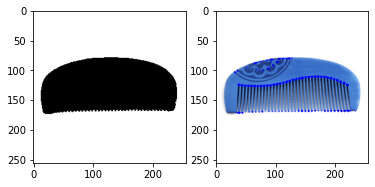

In [12]:
for image_path in images_list:
    #print(image_path)
    image = cv2.imread(image_path)
    image_copy = image.copy()
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    dark_bright_threshold = 200
    mean_of_gray_image = np.mean(image_gray)

    #Select threshold for further operation based on image brightness
    if mean_of_gray_image < dark_bright_threshold:
        # Image i dark
        contour_recognition_threshold = 120
        #print("Dark Image")
    else:
        #Image is bright
        contour_recognition_threshold = 200
        #print("Light Image")

    _, image_thresh = cv2.threshold(image_gray, contour_recognition_threshold, 255, cv2.THRESH_BINARY)

    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(image_gray, "gray")
    plt.subplot(1, 3, 3)
    plt.imshow(image_thresh, "gray")

    plt.subplot(1,2,1)
    plt.imshow(image_thresh, "gray")
    kernel = np.ones((3, 3), np.uint8)
    image_thresh = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    plt.subplot(1, 2, 2)
    plt.imshow(image_thresh, "gray")

    contours, _ = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

    # get greatest contour by area
    im_boundary = (image_thresh.shape[0] - 1) * (image_thresh.shape[1] - 1)
    areas = [cv2.contourArea(ar) for ar in contours]
    cnt = [x for x in areas if x != im_boundary]
    cnt = contours[areas.index(max(cnt))]
    contour_area = cv2.contourArea(cnt)
    #print("Area", contour_area)

    to_show_contour = image_copy.copy()
    cv2.drawContours(to_show_contour, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.imshow(to_show_contour)

    rect = cv2.minAreaRect(cnt)
    rect_area = rect[1][0] * rect[1][1]
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    #print("Rectangle", rect[1][0], rect[1][1])
    to_show_box = image_copy.copy()
    cv2.drawContours(to_show_box, [box], 0, (0, 0, 255), 2)
    plt.imshow(to_show_box)

    a = rect[1][0] / rect[1][1]
    #print(a)

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    to_show_hull = image_copy.copy()
    cv2.drawContours(to_show_hull, [hull], 0, (255, 0, 0), 2)
    plt.imshow(to_show_hull)

    contour_perimeters = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.001 * contour_perimeters, True)
    approximation_area = cv2.contourArea(approx)
    to_show_approx = image_copy.copy()
    cv2.drawContours(to_show_approx, [approx], -1, (0, 0, 255), 3)
    plt.imshow(to_show_approx)

    # Detect corners from grayscale image
    corners = cv2.goodFeaturesToTrack(np.float32(image_gray), 100, 0.01, 10)
    corners = np.int0(corners)
    to_show_corners = image_copy.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(to_show_corners, (x, y), 3, (80, 127, 255), 2)
    plt.imshow(to_show_corners)
    #print("good corners", len(corners))
    
    h_corners = cv2.cornerHarris(np.float32(image_gray), 2, 3, 0.04)
    h_corners = np.int0(h_corners)
    to_show_corners_harris = image_copy.copy()
    h_threshold = 0.05
    for i in range(h_corners.shape[0]):
        for j in range(h_corners.shape[1]):
            if h_corners[i, j] > h_corners.max() * h_threshold:
                cv2.circle(to_show_corners_harris, (j, i), 1, (0, 0, 255), 1)
    plt.imshow(to_show_corners_harris)
    amount_h_corners = len(h_corners[h_corners > h_corners.max() * h_threshold])
    #print("harris corners", amount_h_corners)

    buerste_string = "Buerste"
    kamm_string = "Kamm"
    if buerste_string in image_path:
        object_type = 0
    elif kamm_string in image_path:
        object_type = 1
    
    
    index = image_path.lstrip(image_folder)
    index = index.lstrip('image_')
    index = index.rstrip('.png')
    # Store features as dictionary
    data = {
        "contour_points": len(cnt),
        "amount_contours": len(contours),
        "rect_area": rect_area,
        "hull_area": hull_area,
        "approximation_area": approximation_area,
        "contour_perimeters": contour_perimeters,
        "corners": len(corners),
        "harris_corners": amount_h_corners,
        "ratio_wide_length": rect[1][0] / rect[1][1],
        "contour_length_area_ratio": contour_perimeters / contour_area,
        "contour_length_rect_area_ratio": contour_perimeters / rect_area,
        "contour_length_hull_area_ratio": contour_perimeters / hull_area,
        "contour_rect_length_ratio": contour_perimeters / (2 * (rect[1][0] + rect[1][1])),
        "contour_hull_length_ratio": contour_perimeters / cv2.arcLength(hull, True),
        "extent": contour_area / rect_area,
        "solidity": contour_area / hull_area,
        "hull_rectangle_ratio": hull_area / rect_area,
        "Type": object_type
    }
    print(data)
    field_names = ["contour_points", "amount_contours", "rect_area", "hull_area", "approximation_area",
        "contour_perimeters", "corners", "harris_corners","ratio_wide_length", "contour_length_area_ratio",
        "contour_length_rect_area_ratio", "contour_length_hull_area_ratio",
        "contour_rect_length_ratio", "contour_hull_length_ratio", "extent", "solidity", "hull_rectangle_ratio", "Type"]

    # Save feature into a CSV file
    with open(feature_path, 'a',newline='\n',encoding='utf-8')as f_object:
        # Pass the file object and a list
        # of column names to DictWriter()
        # You will get a object of DictWriter
        dictwriter_object = DictWriter(f_object, fieldnames=field_names)

        # Pass the dictionary as an argument to the Writerow()
        dictwriter_object.writerow(data)

        # Close the file object
        f_object.close()